In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv',encoding='latin1')

In [3]:
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

# 1) DATA Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# droping usless columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
#renaming columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [13]:
# missing values check
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# checking Duplicates values
df.duplicated().sum()

np.int64(403)

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

np.int64(0)

# 2) EDA

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   int64 
 1   text    5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [19]:
# creating pie-chart for spam/ham distribution
import matplotlib.pyplot as plt

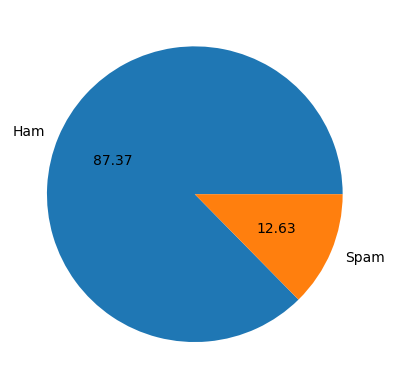

In [20]:
plt.pie(df['target'].value_counts(),labels=['Ham','Spam'],autopct='%0.2f')
plt.show()

### Creating 3 New columns
#### 1) No of characters
#### 2) No of words
#### 3) No of sentense

In [21]:
# 1) No of characters
df['num_characters'] = df['text'].apply(len)

In [22]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [25]:
# 2) No of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [27]:
# 3) No of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# analyzing ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
# analyzing spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


## Visualizing SPAM AND HAM

In [34]:
import seaborn as sns

In [36]:
df[df['target'] == 0]['num_characters']

0       111
1        29
3        49
4        61
6        77
       ... 
5565     12
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 4516, dtype: int64

<Axes: xlabel='num_characters', ylabel='Count'>

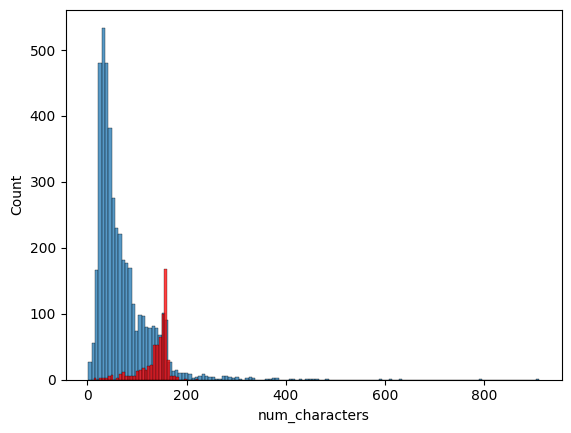

In [39]:
# num_characters for ham  and spam
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

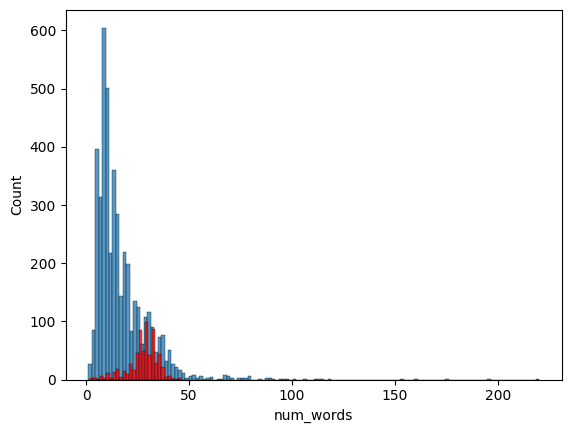

In [40]:
# num_words for ham  and spam
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

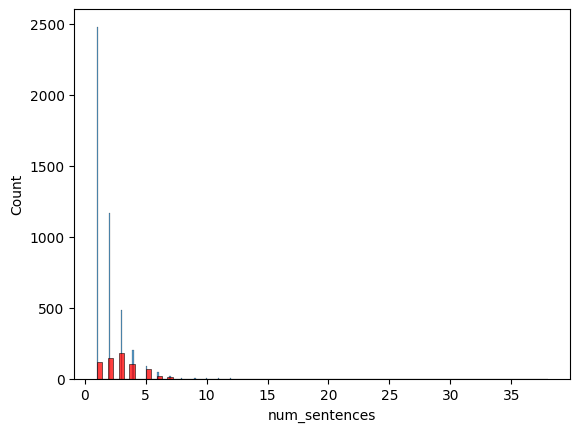

In [41]:
# num_words for ham  and spam
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')

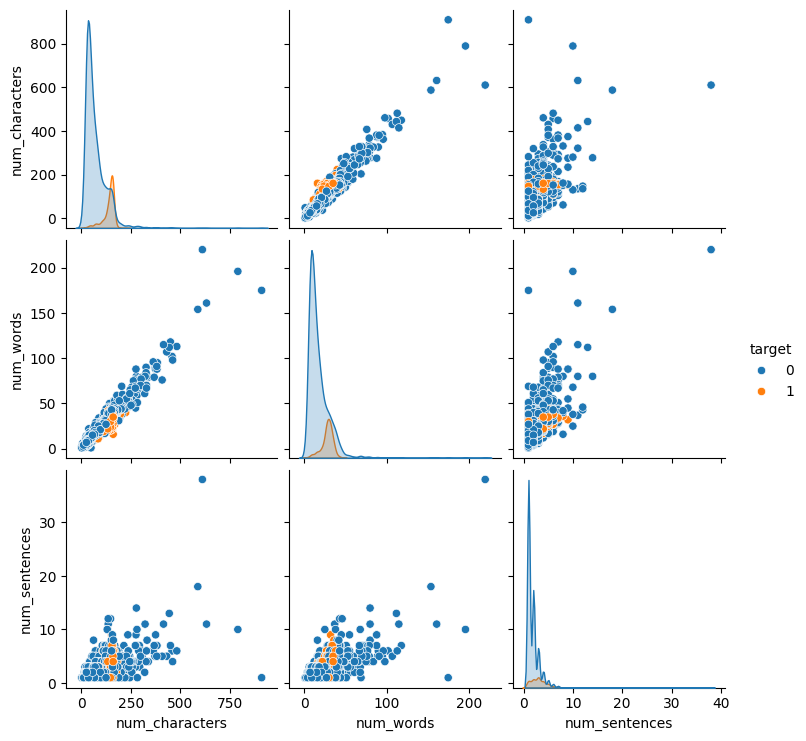

In [44]:
# Relation between colums
sns.pairplot(df,hue='target')

In [47]:
df[['target','num_characters','num_words','num_sentences']].corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

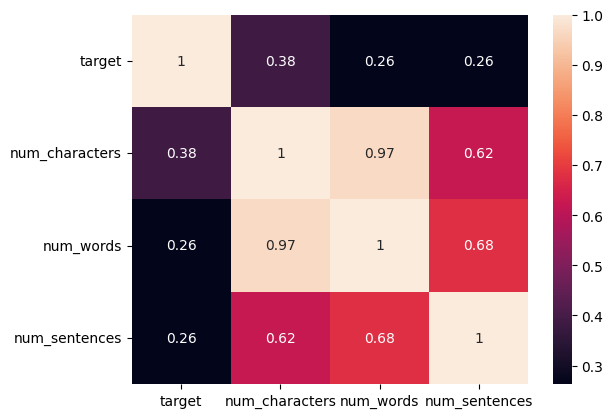

In [49]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

## Data Preprocessing
#### lower case
#### tokenization
#### remove special characters
#### Removing stop words and punctuation
#### stemming

In [54]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [60]:
#stop words
from nltk.corpus import stopwords
stopwords.words('english')

# punctuation string.punctuation
import string

# stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [61]:
def transfrom_text(text):
    text = text.lower() 
    text = nltk.word_tokenize(text)

    # removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y.copy()
    y.clear()
    # removing stop words [is,or] and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y.copy()
    y.clear()
    # stemming
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [64]:
df["transfrom_text"] = df['text'].apply(transfrom_text)

In [66]:
# droping all columns except '"Target","num_characters","transfrom_text"'
final_df = df[['target','num_characters','transfrom_text']]

In [67]:
final_df

,target,num_characters,transfrom_text
0,0,111,go jurong point crazi avail bugi n great world...
1,0,29,ok lar joke wif u oni
2,1,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,49,u dun say earli hor u c alreadi say
4,0,61,nah think goe usf live around though
...,...,...,...
5567,1,161,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,37,b go esplanad fr home
5569,0,57,piti mood suggest
5570,0,125,guy bitch act like interest buy someth els nex...


In [77]:
# Creating WordCloud
from wordcloud import WordCloud
wc = WordCloud(width=800,height=800,min_font_size=10,background_color='white')

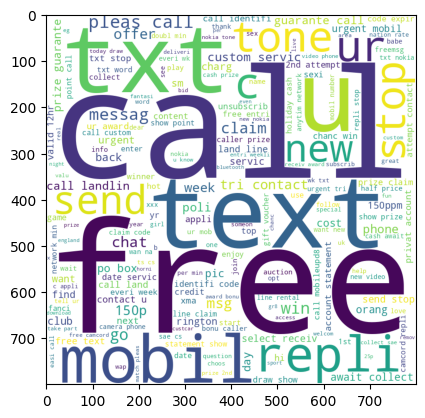

In [78]:
spam_wc = wc.generate(final_df[final_df['target']==1]['transfrom_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

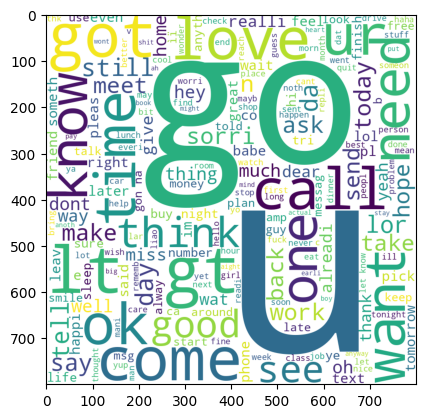

In [79]:
ham_wc = wc.generate(final_df[final_df['target']==0]['transfrom_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

## Top 30 words in spam and Ham

In [112]:
#spam
spam_corpus = []
for msg in final_df[final_df['target'] == 1]['transfrom_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [113]:
len(spam_corpus)

9939

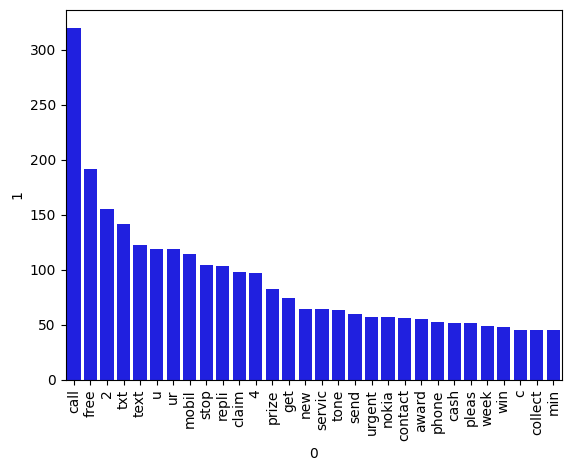

In [114]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],color='blue')
plt.xticks(rotation = 'vertical')
plt.show()

In [115]:
#ham
ham_corpus = []
for msg in final_df[final_df['target'] == 0]['transfrom_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

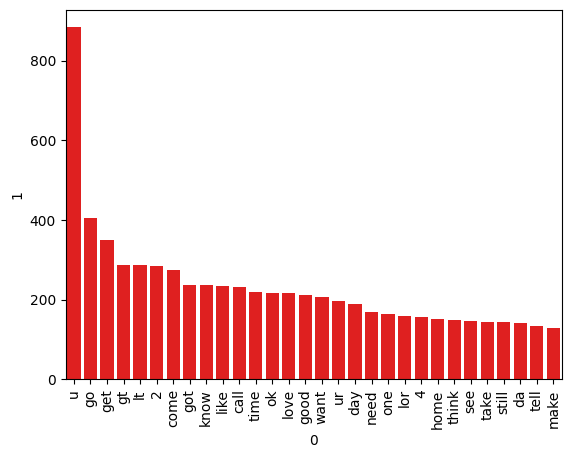

In [117]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],color='red')
plt.xticks(rotation='vertical')
plt.show()

In [118]:
len(ham_corpus)

35404

# Model Building

In [163]:
# converting texts into vectors
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [164]:
# X = cv.fit_transform(df['transfrom_text']).toarray()
X = tfidf.fit_transform(final_df['transfrom_text']).toarray()

In [165]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [166]:
X.shape

(5169, 3000)

In [167]:
y = final_df['target'].values

In [168]:
y.shape

(5169,)

In [169]:
# Train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [171]:
# Naive Baye's
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [172]:
# GaussianNB
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy_score",accuracy_score(y_test,y_pred1))
print("confusion",confusion_matrix(y_test,y_pred1))
print("precision_score",precision_score(y_test,y_pred1))

accuracy_score 0.874274661508704
confusion [[790 106]
 [ 24 114]]
precision_score 0.5181818181818182


In [173]:
# MultinomialNB
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("accuracy_score",accuracy_score(y_test,y_pred2))
print("confusion",confusion_matrix(y_test,y_pred2))
print("precision_score",precision_score(y_test,y_pred2))

accuracy_score 0.9709864603481625
confusion [[896   0]
 [ 30 108]]
precision_score 1.0


In [174]:
# BernoulliNB
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("accuracy_score",accuracy_score(y_test,y_pred3))
print("confusion",confusion_matrix(y_test,y_pred3))
print("precision_score",precision_score(y_test,y_pred3))

accuracy_score 0.9835589941972921
confusion [[895   1]
 [ 16 122]]
precision_score 0.991869918699187


# Deployment


In [175]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))